To the [README](./README.md)

--------------------------------------------------------------------------------

# EDA

--------------------------------------------------------------------------------

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set seaborn style
sns.set_theme(context='paper', style='whitegrid')

In [3]:
# load the data
df1 = pd.read_csv('data/location1.csv')
df2 = pd.read_csv('data/location2.csv')
df3 = pd.read_csv('data/location3.csv')
df4 = pd.read_csv('data/location4.csv')

In [4]:
# check that reading the files worked as intended
df1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
df1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


Everything seems to be in order with the first dataframe.

## Missing Values

In [7]:
df1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [8]:
df2.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [9]:
df3.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [10]:
df4.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

None of the four dataframes misses entries.

## Duplicates

In [11]:
df1.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

In [13]:
df3.duplicated().sum()

0

In [14]:
df4.duplicated().sum()

0

None of the four dataframes contains duplicated entries.

## Time Column and Index

The `Time` column is the only `object`-type column in our dataframes.
Let's convert it into a proper `datetime` type.

In [15]:
for frame in [df1, df2, df3, df4]:
    frame['Time'] = pd.to_datetime(frame['Time'])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 43800 non-null  datetime64[ns]
 1   temperature_2m       43800 non-null  float64       
 2   relativehumidity_2m  43800 non-null  int64         
 3   dewpoint_2m          43800 non-null  float64       
 4   windspeed_10m        43800 non-null  float64       
 5   windspeed_100m       43800 non-null  float64       
 6   winddirection_10m    43800 non-null  int64         
 7   winddirection_100m   43800 non-null  int64         
 8   windgusts_10m        43800 non-null  float64       
 9   Power                43800 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 3.3 MB


Also, because we want to compare the locations with each other, let's create
a combined dataframe.

In [17]:
df1['Location'] = 'Location 1'
df2['Location'] = 'Location 2'
df3['Location'] = 'Location 3'
df4['Location'] = 'Location 4'
df = pd.concat([
    df1,
    df2,
    df3,
    df4
], axis=0)

## Correlations

Our ultimate goal is going to be making predictions on the `Power` output.
So let's have a quick check on its correlation coefficient with the other features.

In [18]:
corr1 = pd.DataFrame(df1.corr(numeric_only=True)['Power']\
    .sort_values(ascending=False)[1:]).reset_index()

corr2 = pd.DataFrame(df2.corr(numeric_only=True)['Power']\
    .sort_values(ascending=False)[1:]).reset_index()

corr3 = pd.DataFrame(df3.corr(numeric_only=True)['Power']\
    .sort_values(ascending=False)[1:]).reset_index()

corr4 = pd.DataFrame(df4.corr(numeric_only=True)['Power']\
    .sort_values(ascending=False)[1:]).reset_index()

In [19]:
corr1['Location'] = 'Location 1'
corr2['Location'] = 'Location 2'
corr3['Location'] = 'Location 3'
corr4['Location'] = 'Location 4'

In [20]:
corr_all = pd.concat([
    corr1,
    corr2,
    corr3,
    corr4
], axis=0)

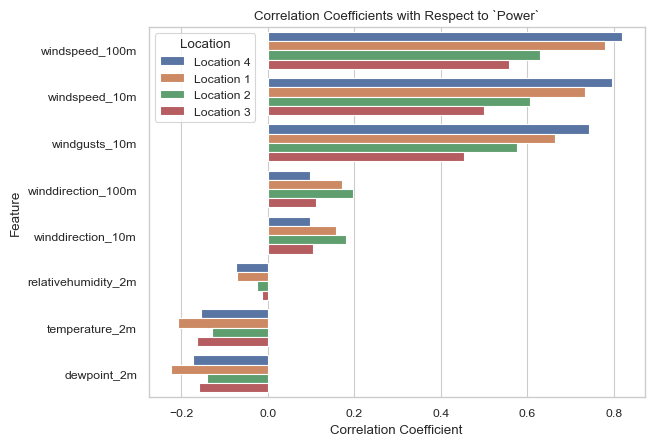

In [21]:
sns.barplot(
    data=corr_all.sort_values('Power', ascending=False),
    x='Power',
    y='index',
    hue='Location'
)
plt.title('Correlation Coefficients with Respect to `Power`')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

All four locations show a similar influence of each individual factor, though
there are notable differences between said locations.  For instance, location
4 benefits far more from the wind parameters than, say location 3, although
the influcence of temperature and humidity seems to be very similar.

There can be many explanations for that; from different hardware, age, state of
maintenance over sensor reliability to actual demand of the power grid and
maybe even the decision to turn individual wind turbines off temporarily.
We have no actual information on those four locations other than what we find
in the data files themselves.

## Power Levels over Time

There is a lot of data to display here; a simple line plot doesn't reveal
anything useful just like that:

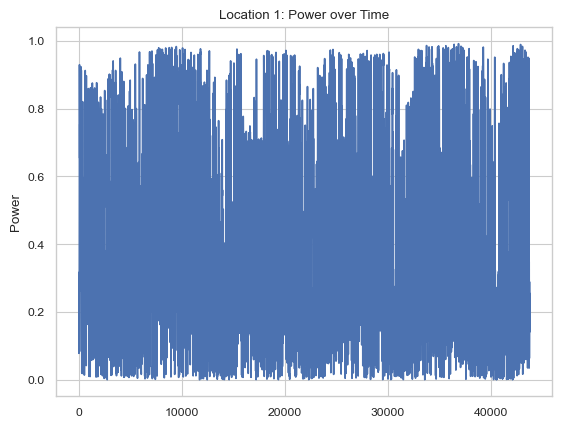

In [22]:
sns.lineplot(df1.Power)
plt.title('Location 1: Power over Time')
plt.show()

Instead, we should try to compare the locations over small time periods like
sesonal power output, maybe day-night cycles, have a look at the average power
output and so on.

For mapping the dime data to a season, we'll use a very simple mapping.
But we have no information on the actual location of the power plant sites;
they could be situated anywhere on earth.  So we make the bold assumption
that all four are located on the northern hemisphere.  Should that assumption
prove wrong (which could be verified by looking deeper into the sesonal
behaviour of the weather data), then a correction of the labels would involve
simply replacing `'Summer'` with `'Winter'` and `'Spring'` with `'Fall'`,
and vice versa.

*Note:*  With the temperature being given in Fahrenheit, chances are that
we are looking at data from a company operating in or from the USA.

In [23]:
def season(time):
    match time.month, time.day:
        case 3, below_21 if below_21 < 21:
            return 'Winter'
        case spring_month, _ if spring_month in [3, 4, 5]:
            return 'Spring'
        case 6, below_21 if below_21 < 21:
            return 'Spring'
        case summer_month, _ if summer_month in [6, 7, 8]:
            return 'Summer'
        case 9, below_21 if below_21 < 21:
            return 'Summer'
        case fall_month, _ if fall_month in [9, 10, 11]:
            return 'Fall'
        case 12, below_21 if below_21 < 21:
            return 'Fall'
        case winter_month, _ if winter_month in [1, 2, 12]:
            return 'Winter'

For the time of day, it would be interesting to see not only day and night,
but also business periods.  Thus, we introduce a few more categories for that:

In [24]:
def time_of_day(time):
    match time.hour:
        case business if 9 <= business and business <= 17:
            return '9 to 5'
        case afternoon if 17 <= afternoon and afternoon <= 22:
            return 'Afternoon'
        case night if 22 <= night or night <= 5:
            return 'Night'
        case morning if 5 <= morning and morning <= 9:
            return 'Morning'

Of course, weekends play a similarly important role, as the `'9 to 5'` period
has less of a business-related role on those.

In [25]:
def is_weekend(time): return time.weekday() > 4

Putting it all together, we create a few new columns:

In [26]:
df['Season'] = df.Time.map(season)

In [27]:
df['Time of Day'] = df.Time.map(time_of_day)

In [28]:
df['Weekend?'] = df.Time.map(is_weekend)

In [29]:
df['Year'] = df.Time.dt.year

In [30]:
df['Month'] = df.Time.dt.month

We can use those features to compare, say, the average power production
in summer 2020:

In [31]:
example = df[(df.Year==2020) & (df.Season=='Summer')]\
        .groupby(['Time of Day', 'Location', 'Month'])[[# aggregate over three features
                'temperature_2m',                       # compute mean values only for
                'relativehumidity_2m',                  # relevant columns
                'dewpoint_2m',
                'windspeed_10m',
                'windspeed_100m',
                'winddirection_10m',
                'winddirection_100m',
                'windgusts_10m',
                'Power',
        ]]\
        .mean()\
        .reset_index()                                  # flatten multi-level index

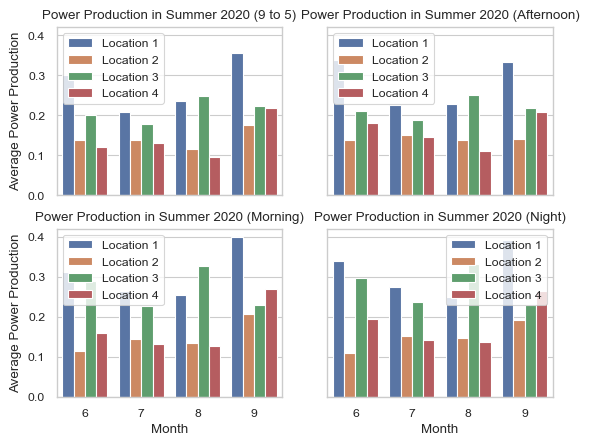

In [32]:
plt.subplots(2, 2, sharex=True, sharey=True)
day_periods = example['Time of Day'].unique()
for idx, tod in enumerate(day_periods):
    plt.subplot(2, 2, idx+1)
    sns.barplot(
        data=example[example['Time of Day']==tod],
        x='Month',
        y='Power',
        hue='Location'
    )
    plt.xlabel('Month')
    plt.ylabel('Average Power Production')
    plt.legend()
    plt.title(f'Power Production in Summer 2020 ({tod})')
plt.show()

Now that in itself is neither interesting nor insightful.  At least so long
as we don't generalize this observation and create a more complete overview.
Although it does allow us to get a feeling for the differences between the
four plant locations, their operational modes and their significance to the
contribution to the power grid as a whole.

For instance, locations 1 and 3 show a higher average power output for the
given time window during the entire day over most of the season.  And while
1, 2 and 4 seem to increase their power production at the end of summer,
number 3 actually decreases it.  Looking at locations 1 and 3 as the extreme
examples in this case, their behaviour could be tied to factors like the
holidays/ summer vacations (which we cannot verify here), hinting towards
1, 2 and 4 proviging larger or more densely populated communities, or
a sesonal change in favourable weather conditions in each of those four
locations.

We can briefly check on that last statement.
Using that `windspeed_10m`, `windspeed_100m` and `windgusts_10m` are the three
strongest contributors to our power output according to our correlation
coefficient analysis earlier, let's have a look at those three features in
the same time frame.  With `temperature_2m` and `dewpoint_2m` being the most
counterproductive influence factors by the same analysis and both exposing
very similar coefficients at that let's also include one of them in our
graphics as well.

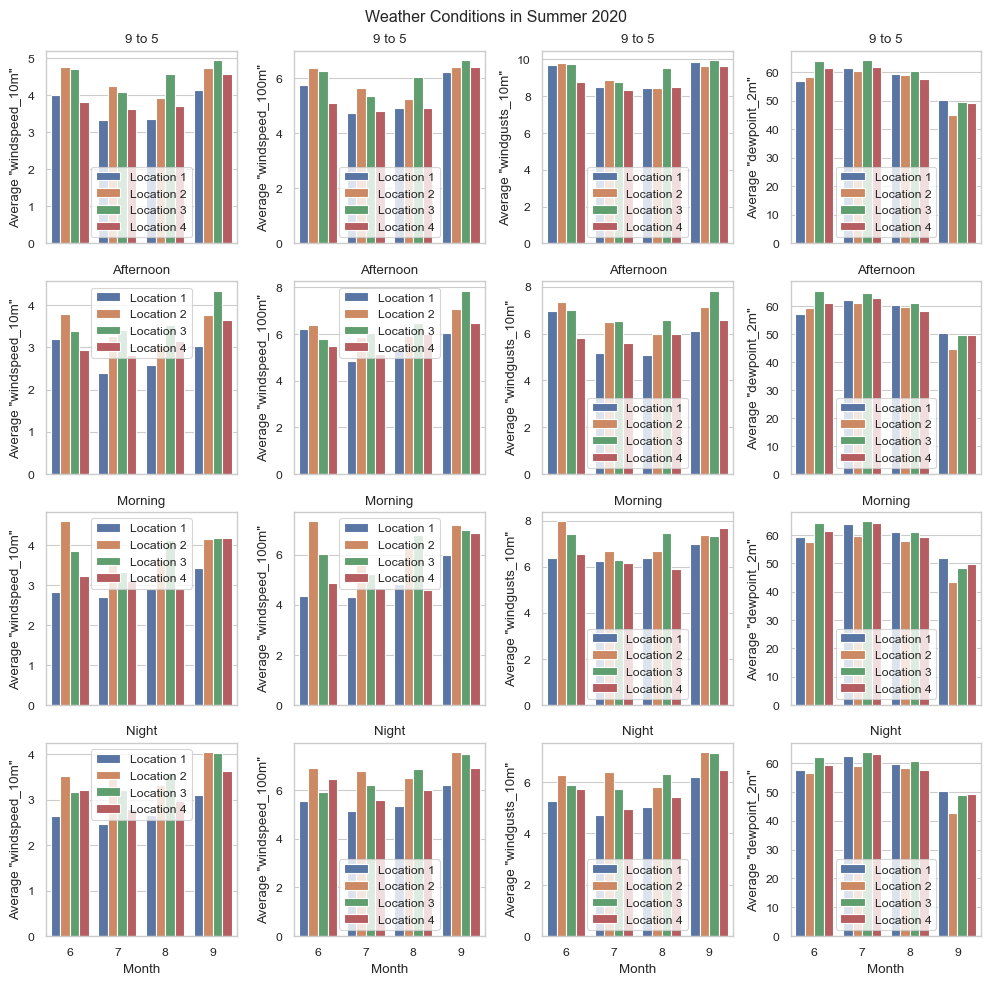

In [33]:
features = ['windspeed_10m', 'windspeed_100m', 'windgusts_10m', 'dewpoint_2m']
fig, _ = plt.subplots(4, 4, sharex=True, sharey=False)    # 4x4 plot grid this time
fig.set_size_inches(10,10)
for f_idx, feat in enumerate(features):
    for d_idx, tod in enumerate(day_periods):
        plt.subplot(4, 4, f_idx+1 + d_idx*4)
        sns.barplot(
            data=example[example['Time of Day']==tod],
            x='Month',
            y=feat,
            hue='Location'
        )
        plt.xlabel('Month')
        plt.ylabel(f'Average "{feat}"')
        plt.title(tod)
        plt.legend()
plt.suptitle('Weather Conditions in Summer 2020')
plt.tight_layout()
plt.show()

While the wind-related data fluctuate quite a bit over the graphics, the general
tendency one can read from those illustrations is that wind intensity does
pick up in the beginning and the end of the season, as well as that the dew point
(as a disruptive factor to power production) drops at the end.

We could go on and on with this, taking a deep look at the meteorological data
available through this dataset.  However, this would miss the point that we are
actually going for: a prediction of the power output for the different locations
and conditions.  And with the weather system being as complex as it is, with
the data available as is we are not going to be able to make concrete, reliable
predictions on the conditions for a given date and translate that into a time-related
power output prediction.  But we *can* look at how the meteorological conditions
affect the plants' performance quantitatively, and that's what we are going to do
in the [ML notebook](./ml.ipynb).

Before we do that, though, let us have a quick look on the influence of the time
feature on the power.  Logically, as there are sesonal as well as daily, weekly,
monthly and annual cycles, we would expect there to be at least some secondary
connections to the power output.  To check this, let's have a quick look at
an arbitrary time window and see if we can spot hints towards such an underlying
pattern.

The following code just takes the previously generated `example` subset of the
original data and illustrates the power output as well as the four features
we discussed earlier as the major influence factors on it over the span of
July 15th, 2020, to July 18th, 2020.

In [34]:
import datetime as dt

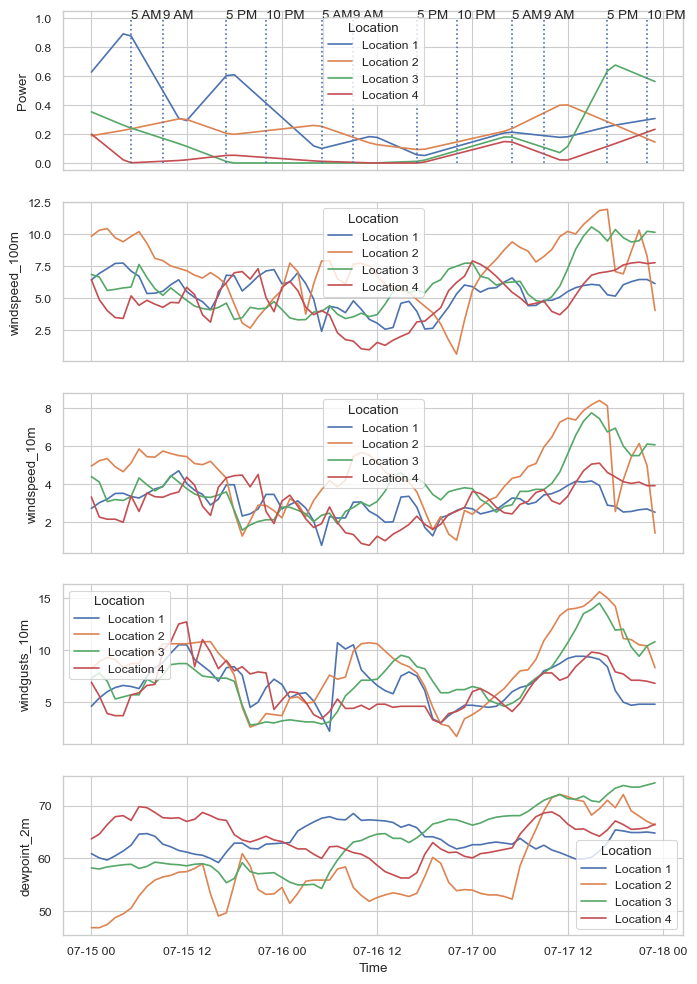

In [35]:
# isolate time range and use `Time` feature as index for the plots
df_time = df[
    (df.Year==2020) &
    (df.Month==7) &
    ((df.Time.dt.day==15)|(df.Time.dt.day==16)|(df.Time.dt.day==17))
].set_index('Time')

fig, _ = plt.subplots(5, 1, sharex=True)    # 5 vertically stacked plots
fig.set_size_inches(8, 12)
plt.subplot(511)
sns.lineplot(df_time, x='Time', y='Power', hue='Location')  # 'Power' plot
line_times = [                                              # daytime lines
    dt.datetime(2020, 7, 15, 5, 0, 0),
    dt.datetime(2020, 7, 15, 9, 0, 0),
    dt.datetime(2020, 7, 15, 17, 0, 0),
    dt.datetime(2020, 7, 15, 22, 0, 0),
    dt.datetime(2020, 7, 16, 5, 0, 0),
    dt.datetime(2020, 7, 16, 9, 0, 0),
    dt.datetime(2020, 7, 16, 17, 0, 0),
    dt.datetime(2020, 7, 16, 22, 0, 0),
    dt.datetime(2020, 7, 17, 5, 0, 0),
    dt.datetime(2020, 7, 17, 9, 0, 0),
    dt.datetime(2020, 7, 17, 17, 0, 0),
    dt.datetime(2020, 7, 17, 22, 0, 0),
]
plt.vlines(line_times, 0, 1, linestyles='dotted')           # draw daytime lines
plt.text(line_times[0], 1, '5 AM')
plt.text(line_times[1], 1, '9 AM')
plt.text(line_times[2], 1, '5 PM')
plt.text(line_times[3], 1, '10 PM')
plt.text(line_times[4], 1, '5 AM')
plt.text(line_times[5], 1, '9 AM')
plt.text(line_times[6], 1, '5 PM')
plt.text(line_times[7], 1, '10 PM')
plt.text(line_times[8], 1, '5 AM')
plt.text(line_times[9], 1, '9 AM')
plt.text(line_times[10], 1, '5 PM')
plt.text(line_times[11], 1, '10 PM')
plt.subplot(512)
sns.lineplot(df_time, x='Time', y='windspeed_100m', hue='Location') # 'windspeed_100m' plot
plt.subplot(513)
sns.lineplot(df_time, x='Time', y='windspeed_10m', hue='Location')  # 'windspeed_10m' plot
plt.subplot(514)
sns.lineplot(df_time, x='Time', y='windgusts_10m', hue='Location')  # 'windgusts_10m' plot
plt.subplot(515)
sns.lineplot(df_time, x='Time', y='dewpoint_2m', hue='Location')    # 'dewpoint_2m' plot
plt.show()

Even though this is a very narrow time window, considering the wealth of data
we are actually have available, we can see a lot going on here.

First, a connection between the power output and the time of day seems to be
confirmed, looking at locations 1 and 3 in the first plot, with local extrema
occuring around 5 A.M. and 5 P.M.  Although the nature of those extrema changes
from case to case.  And of course, those are not the only ones.

We can also see that although seemingly favourable weather conditions were present
during some periods, the plants don't necessarily take full advantage of that.
For instance, location 2 shows a drop of power output after around 12 A.M. on
July 17, 2020, despite wind energy still being present in the atmosphere.
A reason for this could be technical issues, the current demand of the power
grid at that time, inspection, maintenance or some other factor we don't know
about.

And finally, we can see that all four power plants seem to operate in ramps;
smooth inclines or declines in their power output, not following the more
dynamic underlying weather patterns directly.  It could be beneficial for
a model that attempts to use time-related data to take this into account;
essentially being fed information of the current/ immediately previous operational
level.  Forecasting models like Moving Average (MA), Autoregressive Moving
Average (ARMA) or its more complex cousin SARIMAX spring to mind for that job.
Alternatively, I would also like to try out a hand-crafted approach that
makes use of this ramp operation nature.

The question now jumps to mind:  How do we handle the fact that we don't aim
for a forecast but still want to use the time information provided?  The
answer is to provide the date-time data not as a compound, but in its components.
This will allow the models to see sesonal months independant of the time of
day, to spot weekly patterns even over the years without needing to rely on
the chronology of the information.  Actually, we started that already when
we introduced the `Year`, `Month`, `Day` and all the other columns into our
dataframe.  The only missing entry is the `Hour`.  Note that we have been
given the information by the authors of the datasets that that records have
been taken automatically on an hourly basis, so there' no deeper level to
look into.

In [36]:
df['Day of Year'] = df.Time.dt.day_of_year
df['Hour'] = df.Time.dt.hour

## Periodical Data

Our dataset contains a few intrinsically periodical features, such as the wind
direction (from $0^\circ$ to $360^\circ$) or the hour of the day (0 to 23, with
24 being identical to 0 again).

To help our models to understand the underlying periodicity, we can transform
those numbers using $\sin$ and $\cos$ with appropriate periods.  By using
*both* versions we additionally prevent information loss due to the innate
symmetry of either of those functions.  Because they are related to each other
by representing each other derivatives (with the exception of a sign), that
is to say that we store not only the current value of a periodic piece of
data, but also the tendency towards its next state, allowing us to break
up the strictly chronological order of the records if needed.

As an additional benefit, this transformation also scales the data; a step
that we want to perform in the next section with the non-periodic features
as well.

In [37]:
# check on the columns again to see which ones need trigonomical treatment
df.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location', 'Season',
       'Time of Day', 'Weekend?', 'Year', 'Month', 'Day of Year', 'Hour'],
      dtype='object')

In [38]:
# import numpy for the trigonometric functions
from numpy import sin, cos, pi

# transform the two wind direction columns
df['winddirection_10m_s'] = sin(df.winddirection_10m * pi/180.)
df['winddirection_10m_c'] = cos(df.winddirection_10m * pi/180.)
df['winddirection_100m_s'] = sin(df.winddirection_100m * pi/180.)
df['winddirection_100m_c'] = cos(df.winddirection_100m * pi/180.)

In [39]:
# transform the 'Season' column
seasons = df.Season.unique().tolist()
def season_number(season): return seasons.index(season)
df['Season_s'] = sin(df.Season.map(season_number) * pi/2.)
df['Season_c'] = cos(df.Season.map(season_number) * pi/2.)

In [40]:
# transform the 'Month' column
df['Month_s'] = sin(df.Month * pi/6.)
df['Month_c'] = cos(df.Month * pi/6.)

In [41]:
# transform the 'Day of Year' column
df['Day of Year_s'] = sin(df['Day of Year'] * 2.*pi/365.25)
df['Day of Year_c'] = cos(df['Day of Year'] * 2.*pi/365.25)

In [42]:
# transform the 'Hour' column
df['Hour_s'] = sin(df.Hour * pi/12.)
df['Hour_c'] = cos(df.Hour * pi/12.)

## Scaling

Some/ many models benefit from standardized data, that is, projecting the
numbers onto a standard normal distribution with the mean at $0$ and variance
$1$.  Though practices like this are also successfully applied to non-normally
distributed data in some cases.

By transforming our periodical features using trigonometric functions we
achieved this centeredness around $0$ already, and we choose to ignore a
"proper" standardization by re-scaling them, assuming that we won't get a
significant boost in precision or performance out of it.

For columns like `windspeed_10m` and the like, we still can perform such a
transformation, though.  And coming from real-life data, we may assume an
intrinsic underlying behaviour of that of a normal distribution.  We can
thus look optimistically at the postitive contribution to the transformed
data to the models' performances later down the road.

`scikit-learn` contains a simple tool for that job: the `StandardScaler`:

In [43]:
# import the tool
from sklearn.preprocessing import StandardScaler

# instantiate the scaler
scaler = StandardScaler()

# define the columns to perform a scaling on
scaling_columns = [
    'temperature_2m',
    'relativehumidity_2m',
    'dewpoint_2m',
    'windspeed_10m',
    'windspeed_100m',
    'windgusts_10m',
]

# run the scaler over each of those columns:
scaled = scaler.fit_transform(df[scaling_columns])
df[list(map(lambda column: f'{column}_n', scaling_columns))] = scaled

As a little side note:  We made an effort here to preserve the original
information and created new columns for the transformed data conequently.
It is not required to do so, but it's a good practice that allows for flexible
adaptation and an easier correction of mistakes as well as for quick sanity
checks and the generation of understandable graphics later down the road.

## Machine Learning Datasets

Now we are set up for exporting the data we want to use for our machine learning
part.

First, let's export a complete version of our data frame first as a sort of backup.

In [48]:
df.to_csv('data/df.csv')

Next, we want to separate training and verification subsets.  For the non-forecast
style of prediction, we can use the `train_test_split` tool from `scikit-learn`,
setting it up for a training-verification ratio of 3:1.  In this case, we drop
the original `Time` column (alongside some others) from the feature list.

In [49]:
# import the tool from sklearn
from sklearn.model_selection import train_test_split

# define redundant columns
redundant_columns = [
    'Time',
    'temperature_2m',
    'relativehumidity_2m',
    'dewpoint_2m',
    'windspeed_10m',
    'windspeed_100m',
    'winddirection_10m',
    'winddirection_100m',
    'windgusts_10m',
    'Power',
    'Season',
    'Time of Day',
    'Month',
    'Day of Year',
    'Hour',
]

# split the data frame
df_train, df_test = train_test_split(
    df.drop(redundant_columns, axis=1),     # drop redundant columns
    train_size=.75,
    random_state=404
)

# store resulting data frames
df_train.to_csv('data/df_train.csv')
df_test.to_csv('data/df_test.csv')

Should we choose to make a forecast-like prediction, we will need to have those
records in order.  To emulate the same ratio of training and verification data,
thus, we will split them non-randomly like so:

In [56]:
df_train_forecast = df.drop(redundant_columns[1:], axis=1).iloc[:len(df_train),:].set_index('Time')
df_test_forecast = df.drop(redundant_columns[1:], axis=1).iloc[len(df_train):,:].set_index('Time')

In [57]:
# verify that both sets have the same shape
print(df_train.shape, df_train_forecast.shape)
print(df_test.shape, df_test_forecast.shape)

(131400, 21) (131400, 21)
(43800, 21) (43800, 21)


Note that we use the `'Time'` column in this example as the index; this is the
reason why both datasets have the same number of features.  Now let's store
those data frames and we're good to jump right into the machine learning part.

In [58]:
df_train_forecast.to_csv('data/df_train_forecast.csv')
df_test_forecast.to_csv('data/df_test_forecast.csv')